#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html
#Notebook By becswae

Fourier Transform is used to analyze the frequency characteristics of various filters. For images, 2D Discrete Fourier Transform (DFT) is used to find the frequency domain. A fast algorithm called Fast Fourier Transform (FFT) is used for calculation of DFT.
For a sinusoidal signal, x(t) = Asin(2pift), we can say f is the frequency of signal, and if its frequency domain is taken, we can see a spike at f. 
You can consider an image as a signal which is sampled in two directions. So taking fourier transform in both X and Y directions gives you the frequency representation of image.
More intuitively, for the sinusoidal signal, if the amplitude varies so fast in short time, you can say it is a high frequency signal. If it varies slowly, it is a low frequency signal. You can extend the same idea to images. Where does the amplitude varies drastically in images ? At the edge points, or noises. So we can say, edges and noises are high frequency contents in an image. If there is no much changes in amplitude, it is a low frequency component.

## Fourier Transform in Numpy

First we will see how to find Fourier Transform using Numpy. Numpy has an FFT package to do this. np.fft.fft2() provides us the frequency transform which will be a complex array.
Its first argument is the input image, which is grayscale. Second argument is optional which decides the size of output array. If it is greater than size of input image, input image is padded with zeros before calculation of FFT. If it is less than input image, input image will be cropped. If no arguments passed, Output array size will be same as input.

Now once you got the result, zero frequency component (DC component) will be at top left corner. If you want to bring it to center, you need to shift the result by {N}/{2} in both the directions. This is simply done by the function, np.fft.fftshift(). (It is more easier to analyze). Once you found the frequency transform, you can find the magnitude spectrum.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

In [2]:
img = cv2.imread('1.jpg',0)
f = np.fft.fft2(img)
#Shift the zero-frequency component to the center of the spectrum.
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20* np.log(np.abs(fshift))

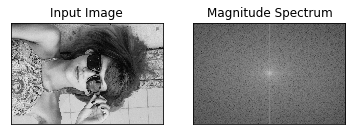

In [3]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

See, You can see more whiter region at the center showing low frequency content is more.

In [4]:
img2 = cv2.imread('2.jpg',0)
f = np.fft.fft2(img2)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20* np.log(np.abs(fshift))

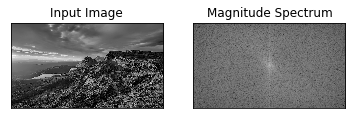

In [5]:
plt.subplot(121),plt.imshow(img2, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [6]:
img3 = cv2.imread('3.jpg',0)
f = np.fft.fft2(img3)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20* np.log(np.abs(fshift))

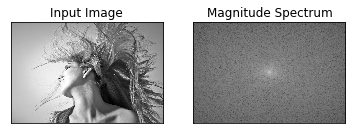

In [7]:
plt.subplot(121),plt.imshow(img3, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

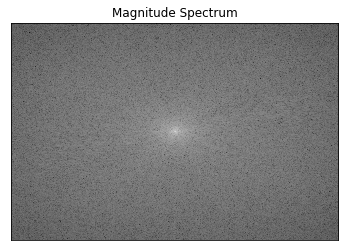

In [8]:
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

So you found the frequency transform Now you can do some operations in frequency domain, like high pass filtering and reconstruct the image, ie find inverse DFT. For that you simply remove the low frequencies by masking with a rectangular window of size 60x60. Then apply the inverse shift using np.fft.ifftshift() so that DC component again come at the top-left corner. Then find inverse FFT using np.ifft2() function. The result, again, will be a complex number. You can take its absolute value.

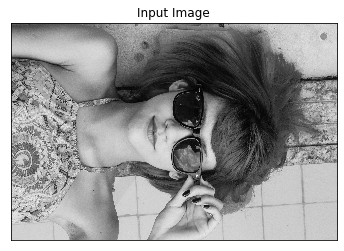

In [19]:
img = cv2.imread('1.jpg',0)
f = np.fft.fft2(img)
#Shift the zero-frequency component to the center of the spectrum.
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20* np.log(np.abs(fshift))
rows, cols = img.shape
crow, ccol = int(math.floor(rows/2)) , int(math.floor(cols/2))
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
#Compute the 2-dimensional inverse discrete Fourier Transform.
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()

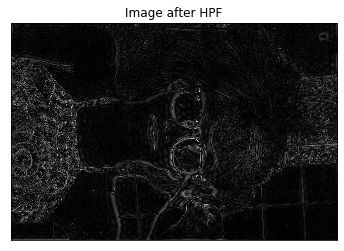

In [20]:
plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.imsave('ed.png', img_back, cmap='gray')
plt.show()

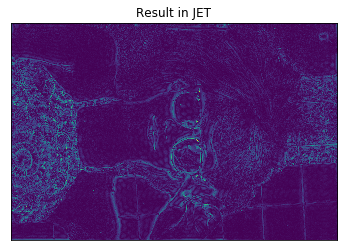

In [21]:
plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

If you closely watch the result, especially the last image in JET color, you can see some artifacts (One instance I have marked in red arrow). It shows some ripple like structures there, and it is called ringing effects. It is caused by the rectangular window we used for masking. This mask is converted to sinc shape which causes this problem. So rectangular windows is not used for filtering. Better option is Gaussian Windows.

## Fourier Transform in OpenCV
OpenCV provides the functions cv2.dft() and cv2.idft() for this. It returns the same result as previous, but with two channels. First channel will have the real part of the result and second channel will have the imaginary part of the result. The input image should be converted to np.float32 first. We will see how to do it.

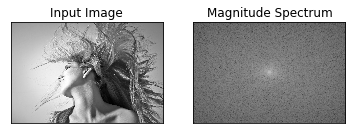

In [22]:
img = cv2.imread('3.jpg',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

So, now we have to do inverse DFT. In previous session, we created a HPF, this time we will see how to remove high frequency contents in the image, ie we apply LPF to image. It actually blurs the image. For this, we create a mask first with high value (1) at low frequencies, ie we pass the LF content, and 0 at HF region.

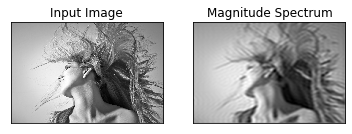

In [23]:
rows, cols = img.shape
crow, ccol = int(math.floor(rows/2)) , int(math.floor(cols/2))

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

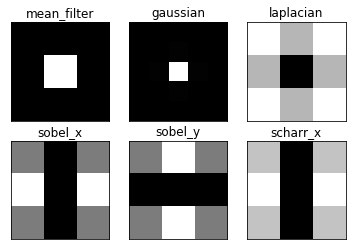

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))

# creating a guassian filter
x = cv2.getGaussianKernel(5,10)
gaussian = x*x.T

# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

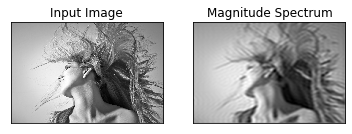

True

In [25]:
rows, cols = img.shape
crow, ccol = int(math.floor(rows/2)) , int(math.floor(cols/2))

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('4.jpg',img) 

In [26]:
plt.imsave('DR.png', img_back, cmap='gray')

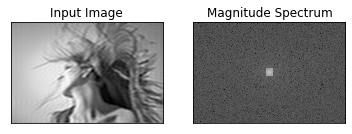

In [27]:
b = cv2.imread('DR.png',0)
f = np.fft.fft2(b)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20* np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(b, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

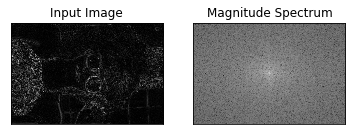

In [28]:
ed = cv2.imread('ed.png',0)
f = np.fft.fft2(ed)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20* np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(ed, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()